## I. Importing essential libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'ANN.ipynb', 'Copy of entire code.ipynb', 'heart.csv', 'Heart_disease_prediction.ipynb', 'Random forest.ipynb', 'README.md', 'Untitled.ipynb']


## II. Importing and understanding our dataset 

In [6]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [7]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0


#### Description

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
###we have no missing values

#### Let's understand our columns better:

In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [9]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


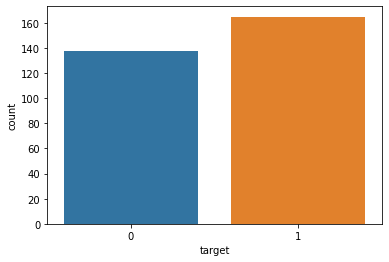

In [10]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp',  'restecg', 'exang', and 'thal' features

### Analysing the 'Sex' feature

In [14]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

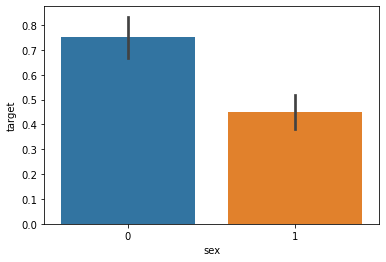

In [15]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [16]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

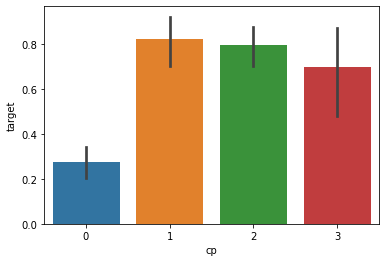

In [17]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the restecg feature

In [18]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

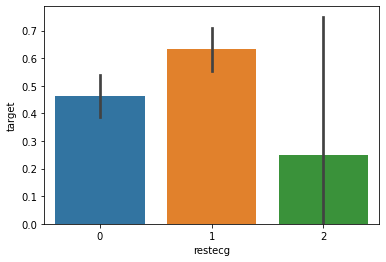

In [19]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [20]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

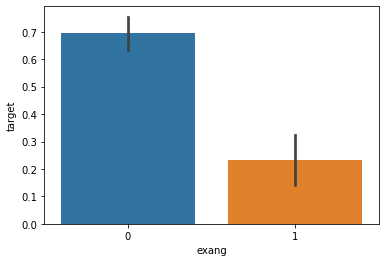

In [21]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

## IV. Train Test split

In [11]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [12]:
X_train.shape

(242, 13)

In [13]:
X_test.shape

(61, 13)

In [14]:
Y_train.shape

(242,)

In [15]:
Y_test.shape

(61,)

## V. Model Fitting

In [16]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [32]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [33]:
Y_pred_lr.shape

(61,)

In [34]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [35]:
 # Precision, Recall for Logistic Regression
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_lr)
print(cm)
accuracy_score(Y_test, Y_pred_lr)

[[22  5]
 [ 4 30]]


0.8524590163934426

### Naive Bayes

In [37]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [38]:
Y_pred_nb.shape

(61,)

In [39]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [40]:
 # Precision, Recall for Naive Bayes
print(classification_report(Y_test, Y_pred_nb)) 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_nb)
print(cm)
accuracy_score(Y_test, Y_pred_nb)

[[21  6]
 [ 3 31]]


0.8524590163934426

### SVM

In [42]:
from sklearn.metrics import classification_report 
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [43]:
Y_pred_svm.shape

(61,)

In [44]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [45]:
 # Precision, Recall for SVM
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_svm)
print(cm)
accuracy_score(Y_test, Y_pred_svm)

[[20  7]
 [ 4 30]]


0.819672131147541

### K Nearest Neighbors

In [47]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [48]:
Y_pred_knn.shape

(61,)

In [49]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [50]:
# Precision,Recall for K-NN (K-Nearest Neighbors)
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        27
           1       0.72      0.68      0.70        34

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61



In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_knn)
print(cm)
accuracy_score(Y_test, Y_pred_knn)

[[18  9]
 [11 23]]


0.6721311475409836

### Decision Tree

In [52]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [53]:
print(Y_pred_dt.shape)

(61,)


In [54]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [55]:
# Precision,Recall for Decision trees
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_dt)
print(cm)
accuracy_score(Y_test, Y_pred_dt)

[[22  5]
 [ 6 28]]


0.819672131147541

### Random Forest

In [57]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

In [58]:
max_accuracy = 0

In [59]:
for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    

In [60]:
if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [61]:
Y_pred_rf.shape

(61,)

In [62]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 83.61 %


In [63]:
# Precision,Recall for Random forest
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_rf)
print(cm)
accuracy_score(Y_test, Y_pred_rf)

[[21  6]
 [ 4 30]]


0.8360655737704918

### XGBoost

In [65]:
from sklearn.metrics import classification_report 
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [66]:
Y_pred_xgb.shape

(61,)

In [67]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [68]:
# Precision,Recall for XGBoost
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_xgb)
print(cm)
accuracy_score(Y_test, Y_pred_xgb)

[[21  6]
 [ 7 27]]


0.7868852459016393

### Neural Network

In [22]:
from sklearn.metrics import classification_report 
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(15,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(X_train,Y_train,epochs=2000)

Epoch 1/2000
8/8 [==============================] - 0s 2ms/step - loss: 29.4422 - accuracy: 0.4587
Epoch 2/2000
8/8 [==============================] - 0s 2ms/step - loss: 17.2231 - accuracy: 0.4587
Epoch 3/2000
8/8 [==============================] - 0s 2ms/step - loss: 5.6012 - accuracy: 0.3967
Epoch 4/2000
8/8 [==============================] - 0s 2ms/step - loss: 4.3711 - accuracy: 0.5000
Epoch 5/2000
8/8 [==============================] - 0s 2ms/step - loss: 3.6729 - accuracy: 0.5083
Epoch 6/2000
8/8 [==============================] - 0s 2ms/step - loss: 2.6583 - accuracy: 0.3802
Epoch 7/2000
8/8 [==============================] - 0s 2ms/step - loss: 2.0422 - accuracy: 0.4132
Epoch 8/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.7687 - accuracy: 0.5124
Epoch 9/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.4869 - accuracy: 0.5165
Epoch 10/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.3563 - accuracy: 0.5372
Epoch 11/2000
8/8

8/8 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8554
Epoch 166/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8512
Epoch 167/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8223
Epoch 168/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8264
Epoch 169/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8347
Epoch 170/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8347
Epoch 171/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8512
Epoch 172/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8099
Epoch 173/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8182
Epoch 174/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8430
Epoch 175/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8512
Epoch 329/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8182
Epoch 330/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8430
Epoch 331/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8430
Epoch 332/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8388
Epoch 333/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8388
Epoch 334/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8388
Epoch 335/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8388
Epoch 336/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8471
Epoch 337/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8306
Epoch 338/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8388
Epoch 411/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8512
Epoch 412/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8388
Epoch 413/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7893
Epoch 414/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7810
Epoch 415/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8140
Epoch 416/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8099
Epoch 417/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8140
Epoch 418/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8471
Epoch 419/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8471
Epoch 420/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8140
Epoch 574/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7851
Epoch 575/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8430
Epoch 576/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8306
Epoch 577/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8388
Epoch 578/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8471
Epoch 579/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8430
Epoch 580/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8306
Epoch 581/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8430
Epoch 582/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8388
Epoch 583/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8347
Epoch 735/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8223
Epoch 736/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8471
Epoch 737/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8306
Epoch 738/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8223
Epoch 739/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8306
Epoch 740/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8182
Epoch 741/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8306
Epoch 742/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8182
Epoch 743/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8099
Epoch 744/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8182
Epoch 898/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8430
Epoch 899/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8388
Epoch 900/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8347
Epoch 901/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8347
Epoch 902/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8306
Epoch 903/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8182
Epoch 904/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8471
Epoch 905/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8223
Epoch 906/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8306
Epoch 907/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8264
Epoch 1059/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8058
Epoch 1060/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8306
Epoch 1061/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8471
Epoch 1062/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8306
Epoch 1063/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8471
Epoch 1064/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8471
Epoch 1065/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8264
Epoch 1066/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8554
Epoch 1067/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8430
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8430
Epoch 1219/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8430
Epoch 1220/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8388
Epoch 1221/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8264
Epoch 1222/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8223
Epoch 1223/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8430
Epoch 1224/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8388
Epoch 1225/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8512
Epoch 1226/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8388
Epoch 1227/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8347
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8347
Epoch 1379/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8264
Epoch 1380/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8388
Epoch 1381/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.8099
Epoch 1382/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8223
Epoch 1383/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8347
Epoch 1384/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8347
Epoch 1385/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8182
Epoch 1386/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8471
Epoch 1387/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8347
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8347
Epoch 1541/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8099
Epoch 1542/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8347
Epoch 1543/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8471
Epoch 1544/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8512
Epoch 1545/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8388
Epoch 1546/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8264
Epoch 1547/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8140
Epoch 1548/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8430
Epoch 1549/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8347
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8264
Epoch 1621/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8430
Epoch 1622/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8306
Epoch 1623/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8388
Epoch 1624/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8306
Epoch 1625/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8512
Epoch 1626/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8264
Epoch 1627/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8388
Epoch 1628/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8347
Epoch 1629/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8223
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8388
Epoch 1782/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8347
Epoch 1783/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8306
Epoch 1784/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8347
Epoch 1785/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8430
Epoch 1786/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8388
Epoch 1787/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8430
Epoch 1788/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8430
Epoch 1789/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8182
Epoch 1790/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7975
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8264
Epoch 1942/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8471
Epoch 1943/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8264
Epoch 1944/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8388
Epoch 1945/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8388
Epoch 1946/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8512
Epoch 1947/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8347
Epoch 1948/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8471
Epoch 1949/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8388
Epoch 1950/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8140
Epoch 

In [25]:
Y_pred_nn = model.predict(X_test)

In [26]:
Y_pred_nn.shape

(61, 1)

In [27]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [28]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 86.89 %


In [29]:
# Precision,Recall for ANN
print(classification_report(Y_test, Y_pred_nn))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_nn)
print(cm)
accuracy_score(Y_test, Y_pred_nn)

[[22  5]
 [ 3 31]]


0.8688524590163934

## VI. Output final score

In [70]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 83.61 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 86.89 %


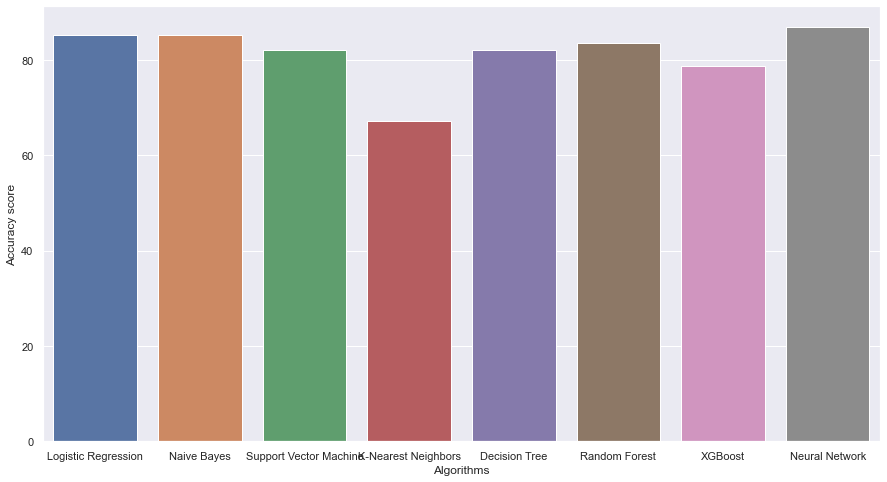

In [71]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)